### Perceptrons - Training

Note for 717005@ Hallym University !

* Make a prediction with weights

In [0]:
def predict(X, w):
    bias = w[0]
    activation = bias + w[1]* X[0] + w[2]* X[1]
    if activation >= 0.0:
        return 1.0
    else:
        return 0.0

* Estimate Perceptron weights using stochastic gradient descent

In [0]:
def train_weights(train, l_rate, n_epoch):#train은 데이터셋이 아니다, 1,0 숫자맞추기 
    weights = [0.0 for i in range(len(train[0]))]
    print(weights)
    print('--------------------')
    
    vb = []
    vw0 = []
    vw1 = []
    for epoch in range(n_epoch):#epoch - > 한 바퀴 돌기 (시대)
        sum_error = 0.0
        for row in train:#중요한 단계 ! 
            prediction = predict(row, weights)
            jd = row[-1]#정답을 빼옴 
            error = jd - prediction#맨 뒤에 있는것이 정답일 확률이 높다 06-2에서 0이 맨뒤 문제를 맞추고 틀리고의 문제다 prediction ->찍은 숫자 
            sum_error += error**2#에러를 누적해서 더한다! 여기까지 텐서플로 내용 
            
            weights[0] = weights[0] + l_rate * error#weights 업데이트, bias 
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]#row[i]가 x입력값 bias와 다르게 weights를 계산할 때 x가 붙는 이유는 편미분 때문이다!!!!!!,weights
            vb.append(weights[0])
            vw0.append(weights[1])
            vw1.append(weights[2])
            
        print('epoch={}, error={}'.format(epoch, sum_error))
    return weights, vb , vw0, vw1

In [0]:
# training set AND gates 
dataset = [[0,0,0],
    [1,0,0],
    [0,1,0],
    [1.1,1]]

* Hyperparameters

In [0]:
l_rate = 0.1#학습속도
n_epoch = 5

In [5]:
weights,vb, vw0, vw1 = train_weights(dataset, l_rate, n_epoch)

[0.0, 0.0, 0.0]
--------------------
epoch=0, error=2.0
epoch=1, error=3.0
epoch=2, error=2.0
epoch=3, error=2.0
epoch=4, error=2.0


In [6]:
print(weights)#에러를 빼는 것이 미분이다 ? ->머신러닝의 기본 

[-0.1, 0.15000000000000005, 0.0]


In [7]:
prediction = predict([0,0], weights)
print(prediction)

0.0


In [8]:
prediction = predict([1,0.0000000000000000000000000000000000000000000000000], weights)
print(prediction)

1.0


In [9]:
prediction = predict([0.67,1], weights)
print(prediction)

1.0


In [0]:
import matplotlib.pyplot as plt 

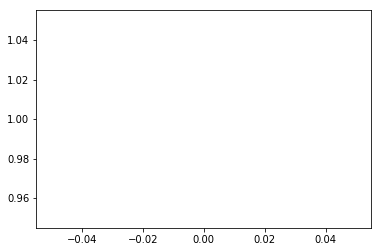

In [11]:
plt.plot(prediction)

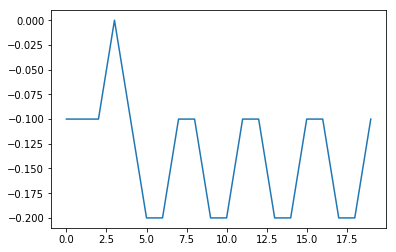

In [12]:
plt.plot(vb)#10개의 데이터가 5번 에폭 해서 x축 50 

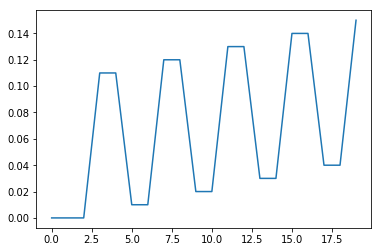

In [13]:
plt.plot(vw0)

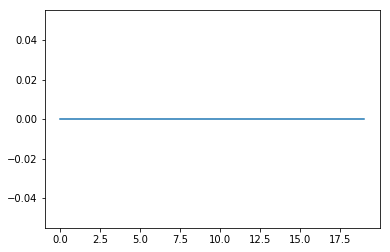

In [14]:
plt.plot(vw1)

* Why ?

partial derivative with respect to m(weights
)

$$ \frac{\partial J(m,b)}{\partial m} =  \frac{1}{n}\sum_{i=1}^{n} -2 x^{(i)} (y_{i}-(mx^{(i)} + b)) \\
= \frac{2}{n}\sum_{i=1}^{n} x^{(i)} ((mx^{(i)} + b)-y^{(i)}) \\
= \frac{2}{n}\sum_{i=1}^{n} x^{(i)} (\hat{y}^{(i)} -y^{(i)})$$

partial derivative with respect to b

$$ \frac{\partial J(m,b)}{\partial b} =  \frac{1}{n}\sum_{i=1}^{n} -2  (y^{(i)}-(mx^{(i)} + b)) \\
= \frac{-2}{n}\sum_{i=1}^{n}  (y^{(i)}-(mx^{(i)} + b)) \\
= \frac{2}{n}\sum_{i=1}^{n}  (\hat{y}^{(i)}-y^{(i)}) \\ $$


Partial derivatives : https://www.mathsisfun.com/calculus/derivatives-partial.html

* References

```
https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/
```